In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

haberman = pd.read_csv("Haberman.csv")

In [5]:
print(haberman.shape)

(306, 4)


In [7]:
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


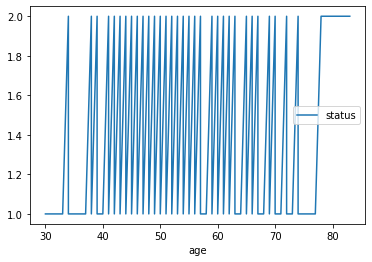

In [13]:
haberman.plot( y='status', x='age');

In [21]:
print(haberman["nodes"].value_counts())

print(sum(haberman["nodes"].value_counts()))

0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: nodes, dtype: int64
306


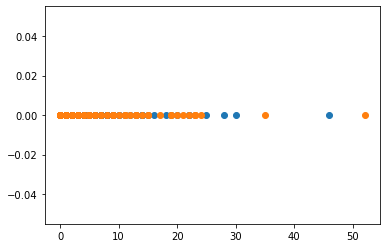

In [27]:
status1 = haberman.loc[haberman['status']==1]
status2 = haberman.loc[haberman['status']==2]

plt.plot(status1['nodes'], np.zeros_like(status1['nodes']),'o')
plt.plot(status2['nodes'], np.zeros_like(status2['nodes']),'o')
plt.show()

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


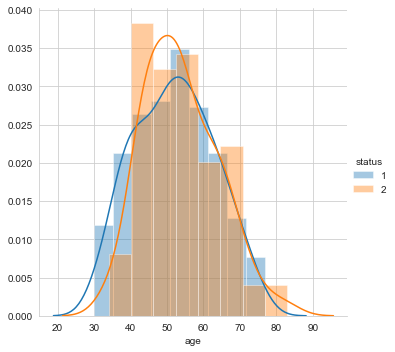

In [72]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

In [ ]:
Patients of age 60 survived the most.

In [73]:
haberman['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

In [36]:
print(status1.describe())
print('1  UP UP UP UP')
print('0  DOWN DOWN DOWN DOWN')
print(status2.describe())


              age        year       nodes  status
count  225.000000  225.000000  225.000000   225.0
mean    52.017778   62.862222    2.791111     1.0
std     11.012154    3.222915    5.870318     0.0
min     30.000000   58.000000    0.000000     1.0
25%     43.000000   60.000000    0.000000     1.0
50%     52.000000   63.000000    0.000000     1.0
75%     60.000000   66.000000    3.000000     1.0
max     77.000000   69.000000   46.000000     1.0
1  UP UP UP UP
0  DOWN DOWN DOWN DOWN
             age       year      nodes  status
count  81.000000  81.000000  81.000000    81.0
mean   53.679012  62.827160   7.456790     2.0
std    10.167137   3.342118   9.185654     0.0
min    34.000000  58.000000   0.000000     2.0
25%    46.000000  59.000000   1.000000     2.0
50%    53.000000  63.000000   4.000000     2.0
75%    61.000000  65.000000  11.000000     2.0
max    83.000000  69.000000  52.000000     2.0


In [41]:
print(np.median(status1['nodes']))
print(np.median(status2['nodes']))

0.0
4.0


We need to predict whether a patient will survive after 5 years or not based on the given paramater

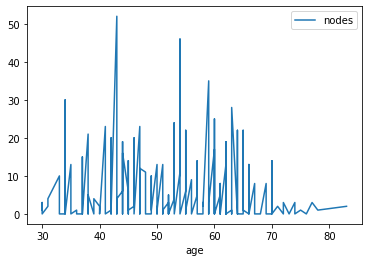

In [48]:
haberman.plot( y='nodes', x='age');

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


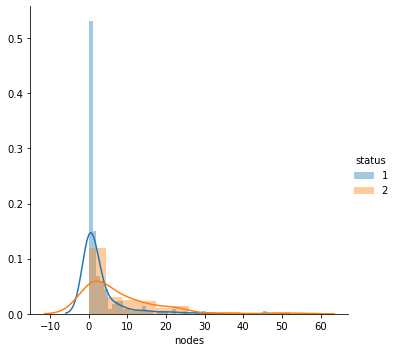

In [60]:
#univariate analysis
sns.FacetGrid(haberman, hue="status", height=5).map(sns.distplot,"nodes").add_legend();
plt.show();


People with 0 nodes survive the most

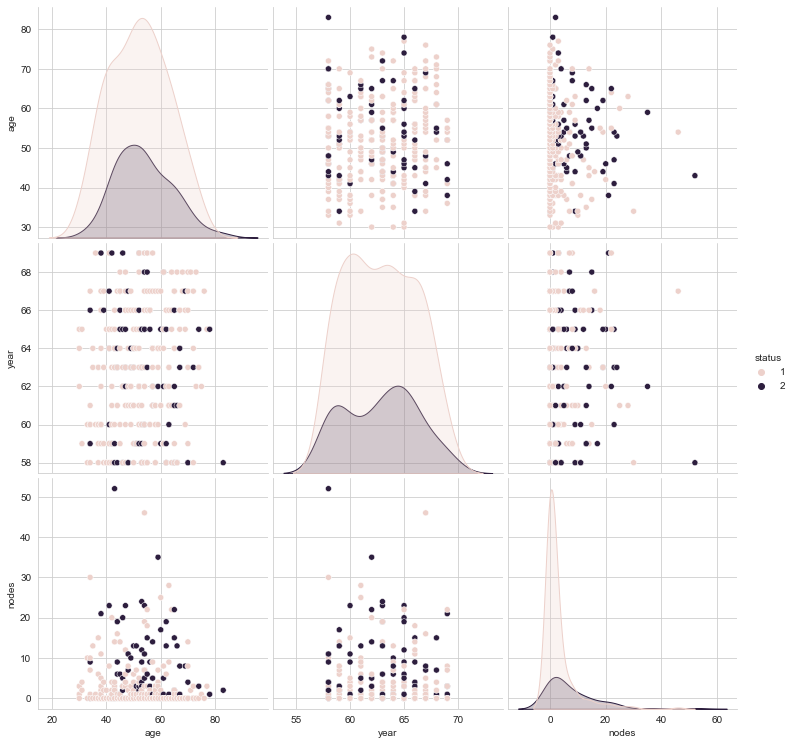

In [98]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue='status', height=3.5)
plt.show()

Data doesnt suggest much because of overlapping

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[0.05333333 0.16       0.28444444 0.37777778 0.54222222 0.70666667
 0.8        0.91111111 0.97333333 1.        ]
[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[0.18666667 0.29333333 0.39555556 0.46666667 0.56444444 0.66666667
 0.73333333 0.83111111 0.92444444 1.        ]
[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]


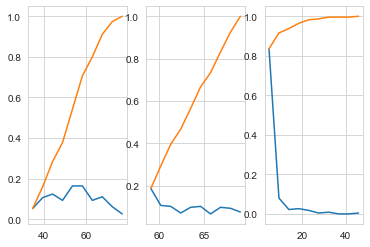

In [95]:
plt.subplot(131)
counts, bin_edges = np.histogram(status1['age'], bins=10,density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

print(pdf)
print(cdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.subplot(132)
counts, bin_edges = np.histogram(status1['year'], bins=10,density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

print(pdf)
print(cdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.subplot(133)

counts, bin_edges = np.histogram(status1['nodes'], bins=10,density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

print(pdf)
print(cdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

#sns.add_legend();
#plt.legend(['PDF', 'CDF'], loc = 5,prop={'size': 8})

plt.show();

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[0.03703704 0.16049383 0.35802469 0.55555556 0.69135802 0.81481481
 0.91358025 0.96296296 0.98765432 1.        ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[0.25925926 0.30864198 0.34567901 0.43209877 0.5308642  0.62962963
 0.79012346 0.86419753 0.91358025 1.        ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


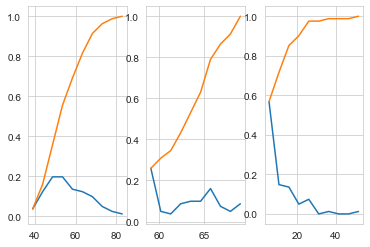

In [99]:
plt.subplot(131)
counts, bin_edges = np.histogram(status2['age'], bins=10,density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

print(pdf)
print(cdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.subplot(132)
counts, bin_edges = np.histogram(status2['year'], bins=10,density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

print(pdf)
print(cdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.subplot(133)

counts, bin_edges = np.histogram(status2['nodes'], bins=10,density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

print(pdf)
print(cdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

#sns.add_legend();
#plt.legend(['PDF', 'CDF'], loc = 5,prop={'size': 8})

plt.show();

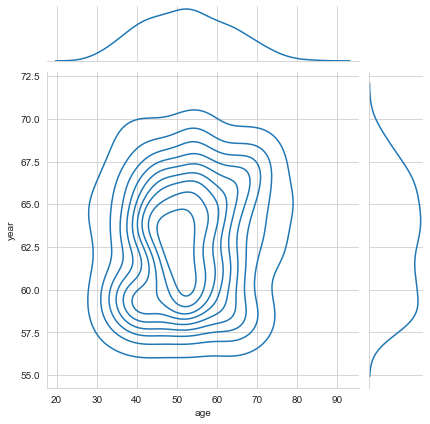

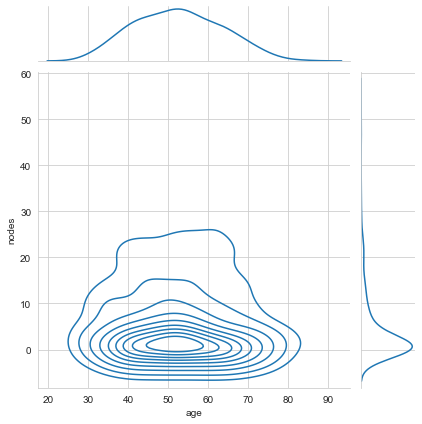

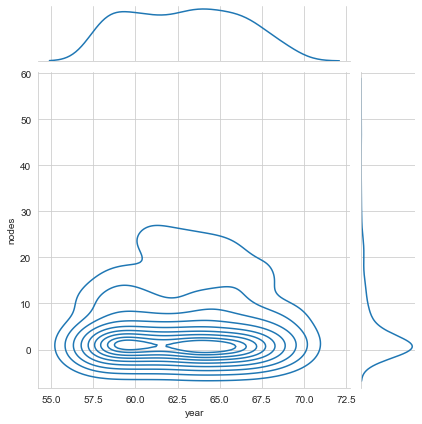

In [104]:
sns.jointplot(x="age",y="year",data=haberman, kind="kde")
plt.show()

sns.jointplot(x="age",y="nodes",data=haberman, kind="kde")
plt.show()

sns.jointplot(x="year",y="nodes",data=haberman, kind="kde")
plt.show()